what is residual Analysis?
Residuals are the differences between the actual values(what we're trying to predict) 
Linear Regression assumes:
Linearity , constant variance , normality , independence 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [4]:
#step 1:load the data
california = fetch_california_housing()
df = pd.DataFrame(california.data,columns=california.feature_names)
df['Price'] = california.target

In [12]:
X = df.drop('Price',axis=1)
y = df['Price']

In [14]:
X_train , X_test,y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [21]:
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(f"\nMAE:{mae:.2f} $100K")
print(f"\nRMSE:{rmse:.2f} $100K")
print(f"\nR2:{r2:.2f}")


MAE:0.53 $100K

RMSE:0.75 $100K

R2:0.58


In [23]:
#step-2:
#residuals = actual-predicted
residuals = y_test - y_pred

In [29]:
print("\nFirst 5 Residuals:")
print(pd.DataFrame({'Actual':y_test[:5], 'Predicted':y_pred[:5],'Residual':residuals[:5]}))


First 5 Residuals:
        Actual  Predicted  Residual
20046  0.47700   0.719123 -0.242123
3024   0.45800   1.764017 -1.306017
15663  5.00001   2.709659  2.290351
20484  2.18600   2.838926 -0.652926
9814   2.78000   2.604657  0.175343


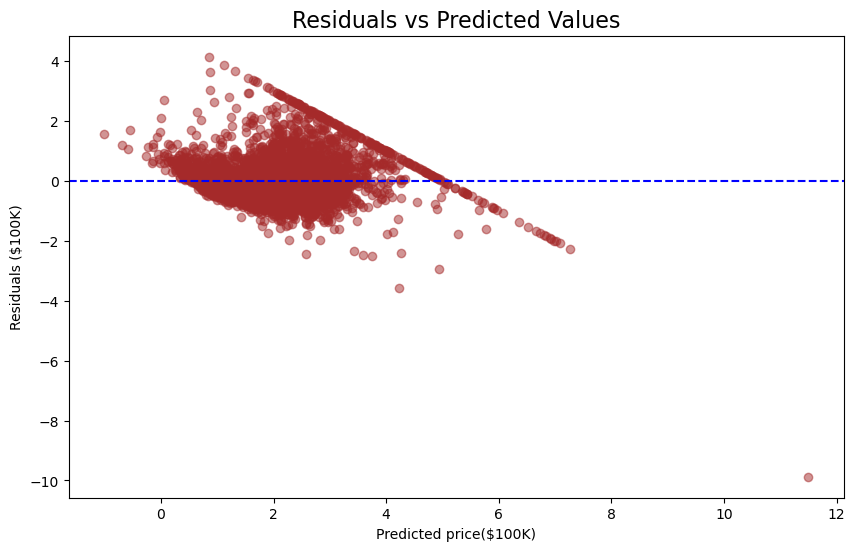

In [37]:
#step-3
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, color='brown',alpha = 0.5)
plt.axhline(y=0,color='blue' , linestyle='--')
plt.title('Residuals vs Predicted Values',fontsize=16)
plt.xlabel('Predicted price($100K)')
plt.ylabel('Residuals ($100K)')
plt.show()

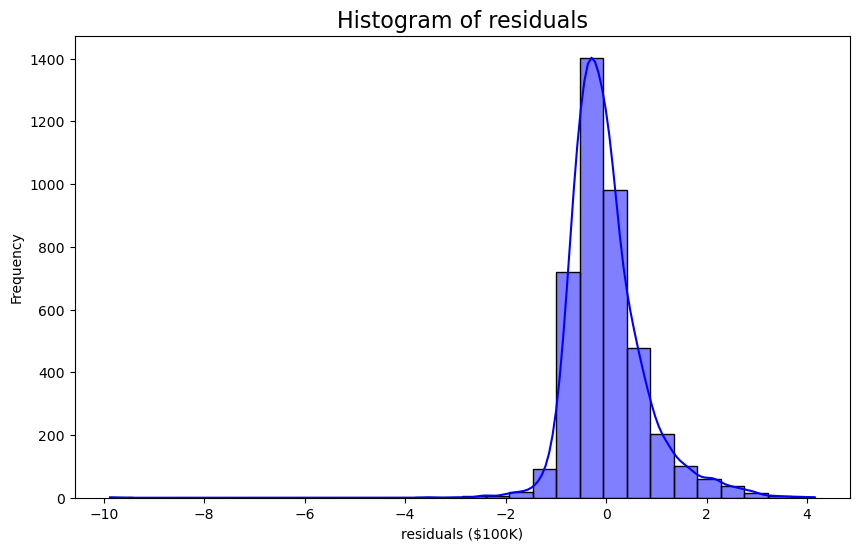

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(residuals,bins=30,kde=True,color='blue')
plt.title('Histogram of residuals',fontsize=16)
plt.xlabel('residuals ($100K)')
plt.ylabel('Frequency')
plt.show()

What to Look For:
Good:Bell-shaped

***Q-Q plot(Normality Check)***

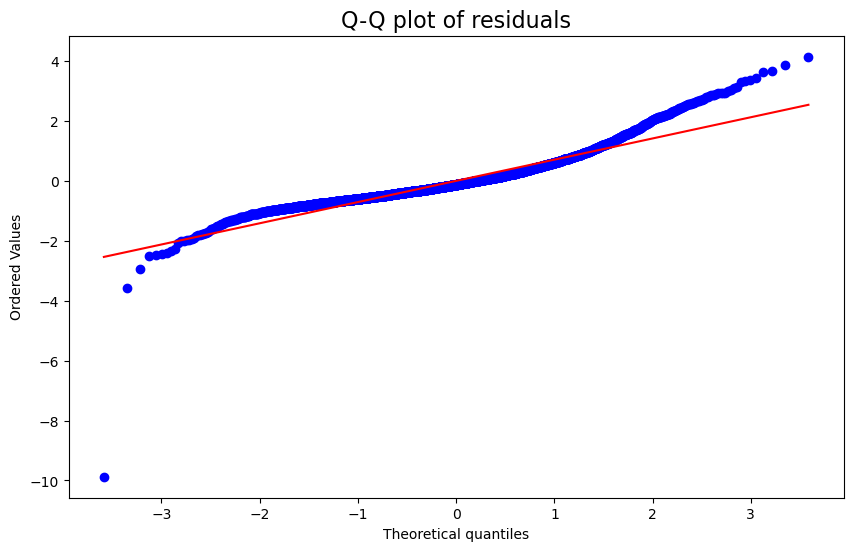

In [44]:
import scipy.stats as stats

plt.figure(figsize=(10,6))
stats.probplot(residuals, dist="norm",plot=plt)
plt.title('Q-Q plot of residuals', fontsize=16)
plt.show()

Good :point follow the red Line(normal)
Bad : Big deviations, especially at ends

our case : Mostly linear , but tails curve off---non-normal extremes(capping effect)

Step - 4: Interpret Residual analysis
Linearity : scatter plot shows no strong cuver -- assumption holds decently.
constant variance : 

***Standarization and Normalization***

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

X , y = make_regression(n_samples=100,n_features=2 , noise=50)
kf = KFold(n_splits=5, shuffle = True, random_state=42)
model = LinearRegression()

scores = cross_val_score(